## Visualizing dyads

Consider an image from skimage.data. For simplicity, say that $X ∈ R^{m \times n}$ is the matrix representing
that image. You are asked to visualize the dyad of the SVD Decomposition of X and the result of compressing
the image via SVD. In particular:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage;

• Load the image into memory and compute its SVD;

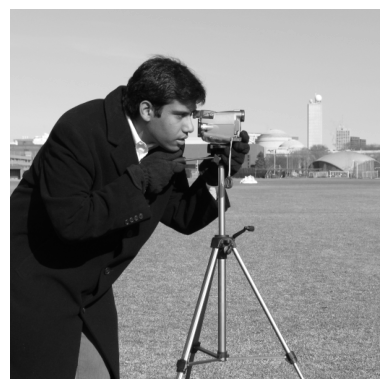

In [3]:
x = skimage.data.camera()
m, n = x.shape

plt.imshow(x, cmap="gray")
plt.axis("off")
plt.show()

U, s, VT = np.linalg.svd(x)

• Visualize some of the dyad $\sigma_i u_i v_i^T$
of this decomposition. What do you notice?

In [4]:
for i in range(1,n,100):
    ui = U[:, i:i+1] 
    vit = VT[i:i+1, :] 
    print(s[i]*(ui@vit),'-'*80, sep='\n')

[[ 44.05921036  44.23854545  44.35918574 ... -10.18353509 -10.55641061
   -9.83447033]
 [ 44.06484107  44.24419908  44.36485478 ... -10.18483653 -10.55775971
   -9.83572716]
 [ 44.08645771  44.26590371  44.3866186  ... -10.18983285 -10.56293897
   -9.84055222]
 ...
 [-35.54527622 -35.68995688 -35.78728482 ...   8.21568441   8.51650604
    7.93407239]
 [-34.84598167 -34.98781597 -35.08322914 ...   8.0540544    8.34895786
    7.77798263]
 [-33.28178232 -33.41724983 -33.50838001 ...   7.69251639   7.97418195
    7.42883719]]
--------------------------------------------------------------------------------
[[ 9.58134996e-02  1.57572597e-02 -4.95481119e-02 ...  1.29875671e-02
   4.95843668e-02  2.22567947e-02]
 [-5.16799471e-02 -8.49916088e-03  2.67252925e-02 ... -7.00524232e-03
  -2.67448477e-02 -1.20048843e-02]
 [ 1.20760998e-03  1.98600658e-04 -6.24492317e-04 ...  1.63692128e-04
   6.24949265e-04  2.80519212e-04]
 ...
 [-9.95820299e-01 -1.63770232e-01  5.14969350e-01 ... -1.34983933e-01
 

Visualize the k-rank approximation of X for different values of k. What do you observe?

Shape of X_k: (512, 512). Rank of X_k: 1.


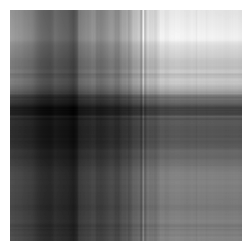

||X - X_k||_2 = 17054.591074801847.
Shape of X_k: (512, 512). Rank of X_k: 11.


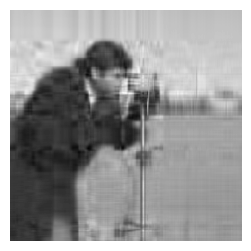

||X - X_k||_2 = 2616.9845050955723.
Shape of X_k: (512, 512). Rank of X_k: 21.


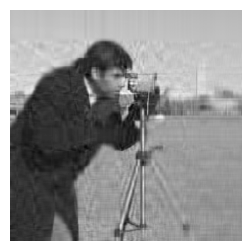

||X - X_k||_2 = 1571.0047480467936.
Shape of X_k: (512, 512). Rank of X_k: 31.


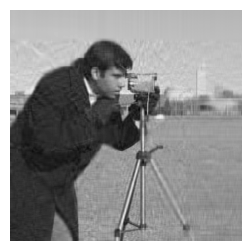

||X - X_k||_2 = 1063.1053415810172.
Shape of X_k: (512, 512). Rank of X_k: 41.


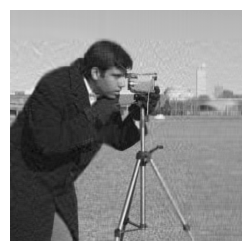

||X - X_k||_2 = 849.1333157027341.
Shape of X_k: (512, 512). Rank of X_k: 51.


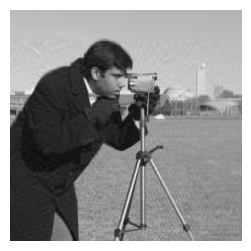

||X - X_k||_2 = 733.2679998555725.
Shape of X_k: (512, 512). Rank of X_k: 61.


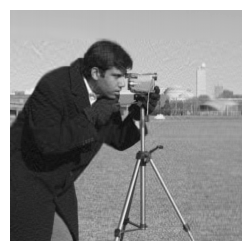

||X - X_k||_2 = 624.975348869699.
Shape of X_k: (512, 512). Rank of X_k: 71.


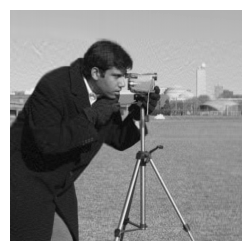

||X - X_k||_2 = 538.3302058751339.
Shape of X_k: (512, 512). Rank of X_k: 81.


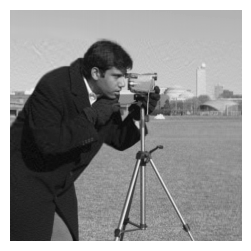

||X - X_k||_2 = 459.8176933457079.
Shape of X_k: (512, 512). Rank of X_k: 91.


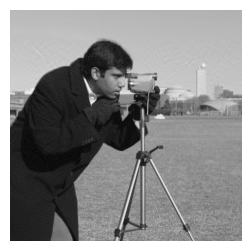

||X - X_k||_2 = 412.6067581823267.


In [5]:
for k in range(1,101,10):
    plt.figure(figsize=(8,3))
    
    # this represent the full svd applied to a Matrix (an image in this case)
    m, n = x.shape
    U, s, VT = np.linalg.svd(x)

    S = np.zeros((m,n)) 
    S[:n, :n] = np.diag(s) 

    X_k = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    print(f"Shape of X_k: {X_k.shape}. Rank of X_k: {np.linalg.matrix_rank(X_k)}.")

    plt.imshow(X_k, cmap='gray') # because it is in grey scale
    plt.axis("off")
    plt.show()

    # Compute the error in Frobenius norm due to the approximation A_k
    print(f"||X - X_k||_2 = {np.linalg.norm(x - X_k, 2)}.")

Compute and plot the approximation error $||X − X_k||_F$ for increasing values of k, where $X_k$ is the
k-rank approximation of k.
F stays for Frobenius Norm

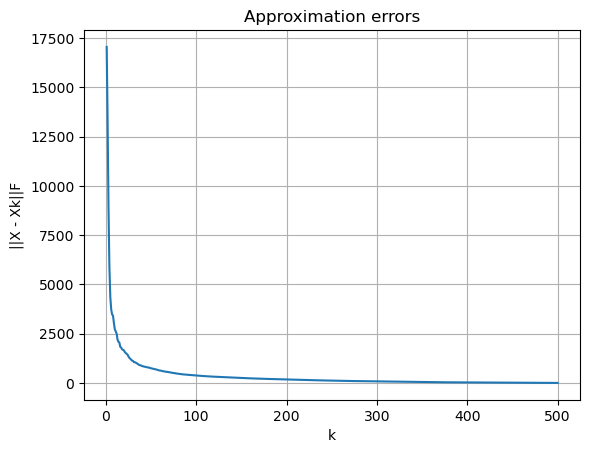

In [6]:
k_numbers = np.arange(1,501,1)
compression_factors = np.ones(k_numbers.shape)
approx_errors = np.zeros(k_numbers.shape)
for k in k_numbers:
    X_k = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    approx_errors[k-1] = np.linalg.norm(x - X_k, 2)
    compression_factors[k-1] = 1 - (k*(m+n+1)/(m*n))
plt.plot(k_numbers, approx_errors)
plt.grid()
plt.title("Approximation errors")
plt.xlabel("k")
plt.ylabel("||X - Xk||F")
plt.show()

• Plot the compression factor $ck = 1 - \frac{k(m+n+1)}{mn}$
for increasing k. What is the approximation error when
the compressed image requires the same amount of informations of those of the uncompressed image 
(i.e. ck = 1)?

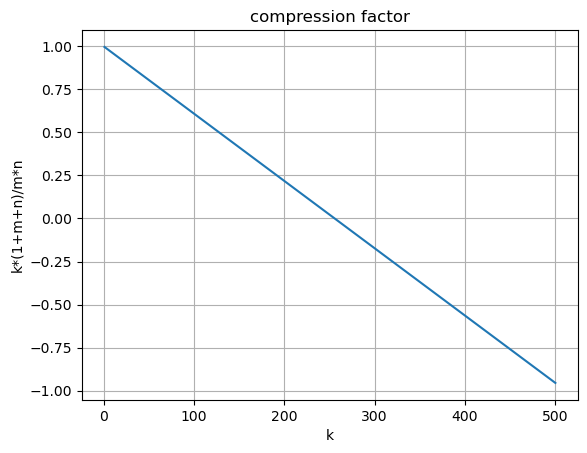

In [7]:
plt.plot(k_numbers, compression_factors)
plt.grid()
plt.title("compression factor")
plt.xlabel("k")
plt.ylabel("k*(1+m+n)/m*n")
plt.show()